# Екзаменаційна робота
# Бондаревська Поліна Олександрівна

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
data = pd.read_csv('dataset/Expanded_data_with_more_features.csv')
data.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## Проаналізуйте розподіл за статтю серед учнів.

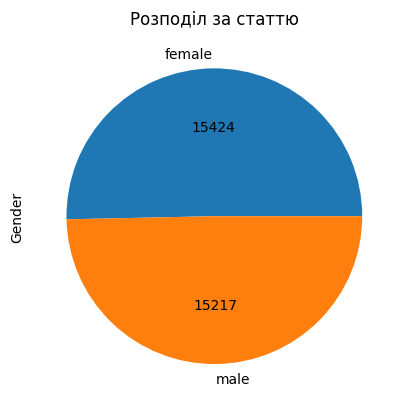

In [28]:
marriage_count = data['Gender'].value_counts()

marriage_count.plot(kind="pie", autopct= lambda x: '{:.0f}'.format(x*marriage_count.sum()/100))
plt.title("Розподіл за статтю")
plt.show()

1. Скільки студентів і студенток у наборі даних?

In [51]:
(data['Gender'].value_counts()['male'] + data['Gender'].value_counts()['female'])

30641

2. Який відсоток студентів чоловічої статі в наборі даних?

In [31]:
(data['Gender'].value_counts()['male'] / data.shape[0]) * 100

49.6622172905584

3. Який відсоток студенток у наборі даних?

In [32]:
(data['Gender'].value_counts()['female'] / data.shape[0]) * 100

50.337782709441605

## Дослідіть зв’язок між етнічною групою та результатами тестів.

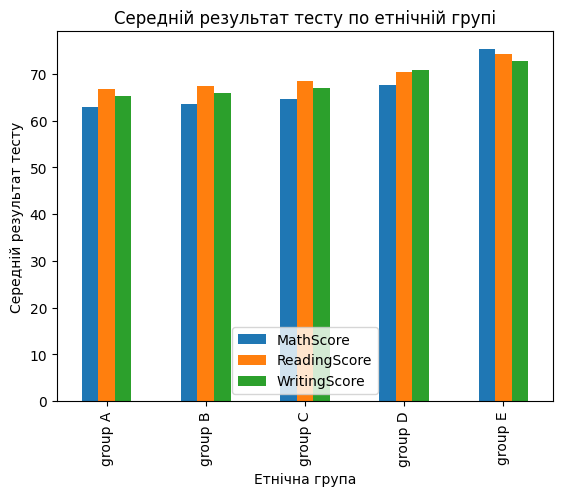

In [33]:
ethnic_means = data[["EthnicGroup", "MathScore", "ReadingScore", "WritingScore"]].groupby("EthnicGroup").mean()

ethnic_means.plot(kind="bar", y=["MathScore", "ReadingScore", "WritingScore"])
plt.xlabel("Етнічна група")
plt.ylabel("Середній результат тесту")
plt.title("Середній результат тесту по етнічній групі")
plt.show()

4. Яка етнічна група має найвищий середній бал з математики?

In [34]:
data.groupby('EthnicGroup')['MathScore'].mean().idxmax()

'group E'

5. Яка етнічна група має найвищий середній бал читання?

In [35]:
data.groupby('EthnicGroup')['ReadingScore'].mean().idxmax()

'group E'

6. Яка етнічна група має найвищий середній бал з письма?

In [36]:
data.groupby('EthnicGroup')['WritingScore'].mean().idxmax()

'group E'

## Дослідіть вплив курсу підготовки до тесту на результати тесту.

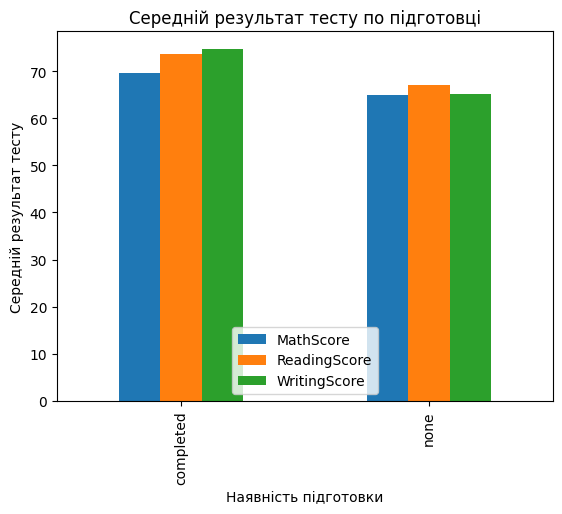

In [37]:
tests_means = data[["TestPrep", "MathScore", "ReadingScore", "WritingScore"]].groupby("TestPrep").mean()

tests_means.plot(kind="bar", y=["MathScore", "ReadingScore", "WritingScore"])
plt.xlabel("Наявність підготовки")
plt.ylabel("Середній результат тесту")
plt.title("Середній результат тесту по підготовці")
plt.show()

7. Який середній бал з математики для студентів, які закінчили курс підготовки до тесту?

In [39]:
data[data['TestPrep'] == 'completed']['MathScore'].mean()

69.5466599698644

8. Який середній бал з читання для студентів, які пройшли курс підготовки до тесту?

In [40]:
data[data['TestPrep'] == 'completed']['ReadingScore'].mean()

73.73299849321948

9. Який середній бал для студентів, які закінчили курс підготовки до тесту?

In [41]:
data.groupby('EthnicGroup')['MathScore'].mean().idxmax()

'group E'

## Проаналізуйте розподіл батьків(ів) за сімейним станом серед учнів.

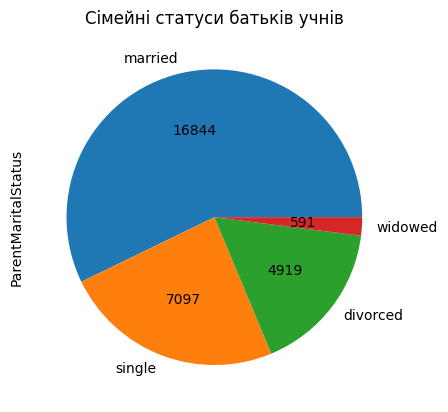

In [42]:
marriage_count = data['ParentMaritalStatus'].value_counts()

marriage_count.plot(kind="pie", autopct= lambda x: '{:.0f}'.format(x*marriage_count.sum()/100))
plt.title("Сімейні статуси батьків учнів")
plt.show()

10. Скільки студентів мають одружених батьків?

In [43]:
data[data['ParentMaritalStatus'] == 'married'].shape[0]

16844

11. Скільки студентів мають батьків-одинаків?

In [44]:
data[data['ParentMaritalStatus'] == 'single'].shape[0]

7097

## Дослідіть зв’язок між заняттями спортом і результатами тестів.

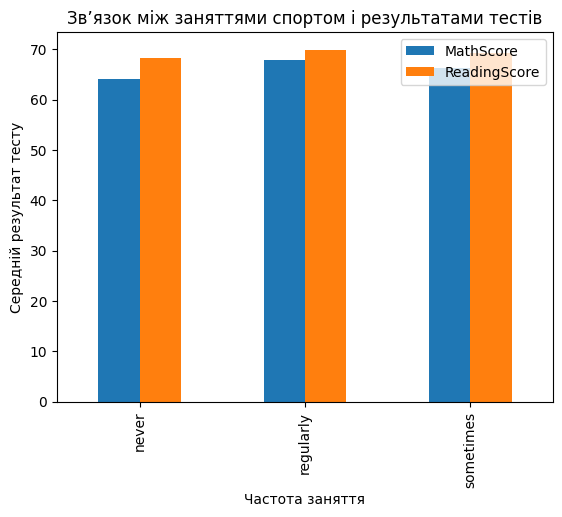

In [45]:
sport_means = data[["PracticeSport", "MathScore", "ReadingScore"]].groupby("PracticeSport").mean()

sport_means.plot(kind="bar")
plt.xlabel("Частота заняття")
plt.ylabel("Середній результат тесту")
plt.title("Зв’язок між заняттями спортом і результатами тестів")
plt.show()

12. Чи студенти, які регулярно займаються спортом, мають вищі середні результати з математики, ніж ті, хто ніколи не займається спортом?

In [46]:
avg_math_sports = data.groupby('PracticeSport')['MathScore'].mean()
avg_math_sports['regularly'] > avg_math_sports['never']

True

13. Чи студенти, які регулярно займаються спортом, мають вищі середні результати читання, ніж ті, хто ніколи не займається спортом?

In [47]:
avg_reading_sports = data.groupby('PracticeSport')['ReadingScore'].mean()
avg_reading_sports['regularly'] > avg_reading_sports['never']

True

## Проаналізуйте розподіл транспортних засобів до школи серед учнів.

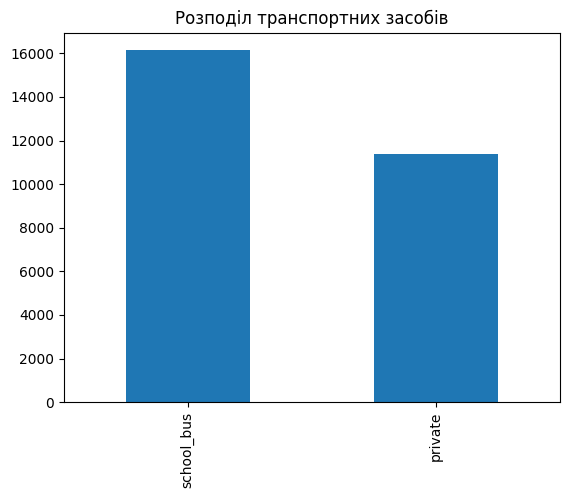

In [48]:
transport_count = data['TransportMeans'].value_counts()

transport_count.plot(kind="bar")
plt.title("Розподіл транспортних засобів")
plt.show()

14. Скільки учнів користується шкільним автобусом, щоб дістатися до школи?

In [49]:
data[data['TransportMeans'] == 'school_bus'].shape[0]

16145

15. Скільки учнів користується приватним транспортом, щоб дістатися до школи?

In [50]:
data[data['TransportMeans'] == 'private'].shape[0]

11362

## Передбачте, чи завершив студент курс підготовки до іспиту, на основі його демографічних та академічних даних.
#### Вхідні дані: Gender, EthnicGroup, ParentEduc, LunchType, ParentMaritalStatus, PracticeSport, IsFirstChild, NrSiblings,       TransportMeans, WklyStudyHours, MathScore, ReadingScore, WritingScore Результат: TestPrep

## Розбиваємо дані на дані тестові та дані тренування

In [77]:
selected = data[[
    'Gender','EthnicGroup','ParentEduc','LunchType','ParentMaritalStatus',
    'PracticeSport','IsFirstChild','NrSiblings','TransportMeans','WklyStudyHours',
    'MathScore','ReadingScore','WritingScore', 'TestPrep'
]].dropna()

test_data = selected.sample(frac=0.2, random_state=0)
train_data = selected.drop(test_data.index)

## Розбиваємо на вхідні та вихідні дані

In [73]:
def prepare_xy(df):
    return (pd.get_dummies(df.drop('TestPrep', axis=1)).to_numpy(), 
            df['TestPrep'].apply(lambda x: 1 if x == 'completed' else 0).to_numpy())


x_train, y_train = prepare_xy(train_data)
x_test, y_test = prepare_xy(test_data)

## Створюємо модель

In [74]:
import tensorflow as tf

columns_count = x_train.shape[1]

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(columns_count,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2024-05-03 10:49:11.132498: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Тренуємо модель

In [75]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
482/482 [==============================] - 2s 1ms/step - loss: 1.5011 - accuracy: 0.6345
Epoch 2/15
482/482 [==============================] - 1s 2ms/step - loss: 0.5574 - accuracy: 0.7100
Epoch 3/15
482/482 [==============================] - 1s 1ms/step - loss: 0.5295 - accuracy: 0.7356
Epoch 4/15
482/482 [==============================] - 1s 1ms/step - loss: 0.5268 - accuracy: 0.7343
Epoch 5/15
482/482 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7328
Epoch 6/15
482/482 [==============================] - 1s 1ms/step - loss: 0.5218 - accuracy: 0.7372
Epoch 7/15
482/482 [==============================] - 1s 1ms/step - loss: 0.5224 - accuracy: 0.7404
Epoch 8/15
482/482 [==============================] - 1s 1ms/step - loss: 0.5183 - accuracy: 0.7404
Epoch 9/15
482/482 [==============================] - 1s 1ms/step - loss: 0.5183 - accuracy: 0.7436
Epoch 10/15
482/482 [==============================] - 1s 1ms/step - loss: 0.5214 - accuracy: 0.7412

## Перевіряємо точність моделі

In [76]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print ("Train dataset:")
print ("\tloss:", train_loss)
print("\taccuracy:", train_accuracy)

print ("\nTest dataset:")
print ("\tloss:", test_loss)
print("\taccuracy:", test_accuracy)

121/121 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.7480
Train dataset:
	loss: 0.5063837766647339
	accuracy: 0.751396656036377

Test dataset:
	loss: 0.5121644139289856
	accuracy: 0.7479864954948425
